### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import seaborn as sns

#### Reading csv

In [2]:
df=pd.read_csv("tel_churn1.csv")

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
x=df.drop('Churn',axis=1)

In [5]:
y=df['Churn']

##### Train Test Split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [7]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [8]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [9]:
model_dt.score(x_test,y_test)

0.7953091684434968

[[938  90]
 [198 181]]


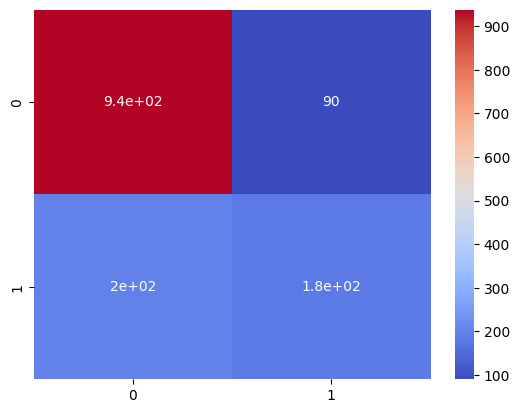

In [10]:
cf_matrix =metrics.confusion_matrix(y_test, y_pred)
# labels = ['True Neg','False Pos','False Neg','True Pos']
# labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')
print(cf_matrix)

In [11]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1028
           1       0.67      0.48      0.56       379

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.78      0.80      0.78      1407



In [12]:
print(metrics.f1_score(y_test,y_pred,labels = [0,1]))
print(metrics.recall_score(y_test,y_pred,labels = [0,1]))
print(metrics.precision_score(y_test,y_pred,labels = [0,1]))
print(metrics.accuracy_score(y_test,y_pred))

0.556923076923077
0.47757255936675463
0.6678966789667896
0.7953091684434968


###### Hence, moving ahead to call SMOTEENN (UpSampling)

In [13]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [14]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [15]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [16]:
model_dt_smote.fit(xr_train,yr_train)
yr_pred = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_pred))

0.9107296137339056
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       549
           1       0.89      0.95      0.92       616

    accuracy                           0.91      1165
   macro avg       0.91      0.91      0.91      1165
weighted avg       0.91      0.91      0.91      1165



[[473  76]
 [ 28 588]]


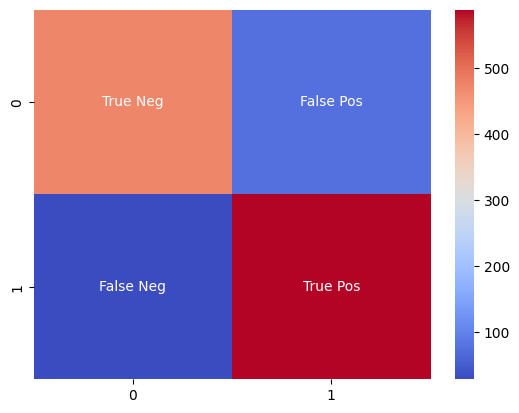

In [17]:
cf_matrix =metrics.confusion_matrix(yr_test, yr_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
print(cf_matrix)

In [18]:
print(metrics.f1_score(yr_test,yr_pred,labels = [0,1]))
print(metrics.recall_score(yr_test,yr_pred,labels = [0,1]))
print(metrics.precision_score(yr_test,yr_pred,labels = [0,1]))
print(metrics.accuracy_score(yr_test,yr_pred))

0.91875
0.9545454545454546
0.8855421686746988
0.9107296137339056


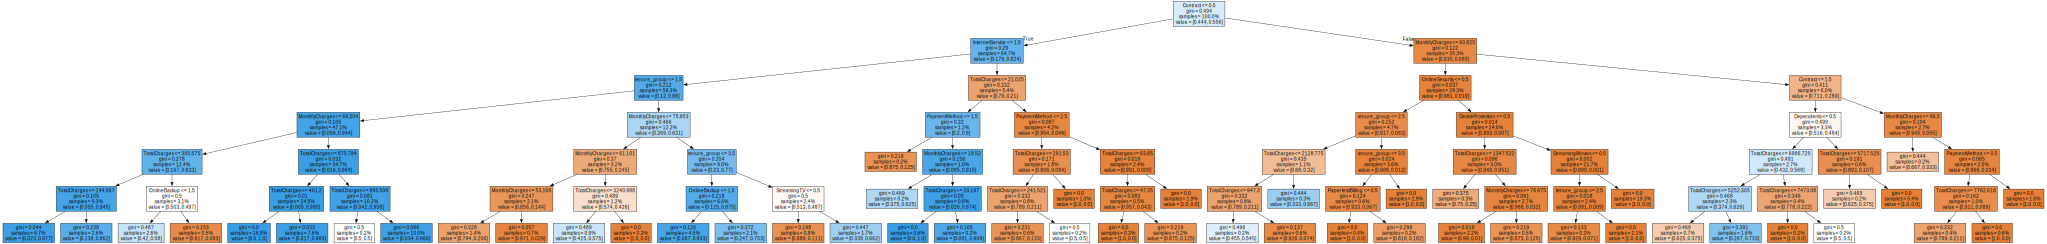

In [19]:
import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(model_dt_smote,
                            feature_names=xr_train.columns,  
                            filled=True,  
                            max_depth=6, 
                            impurity=True, 
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

#### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [22]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [23]:
y_pred=model_rf.predict(x_test)

In [24]:
model_rf.score(x_test,y_test)

0.7960199004975125

In [25]:
print(metrics.f1_score(y_test,y_pred,labels = [0,1]))
print(metrics.recall_score(y_test,y_pred,labels = [0,1]))
print(metrics.precision_score(y_test,y_pred,labels = [0,1]))
print(metrics.accuracy_score(y_test,y_pred))

0.5604900459418071
0.48284960422163586
0.6678832116788321
0.7960199004975125


[[937  91]
 [196 183]]


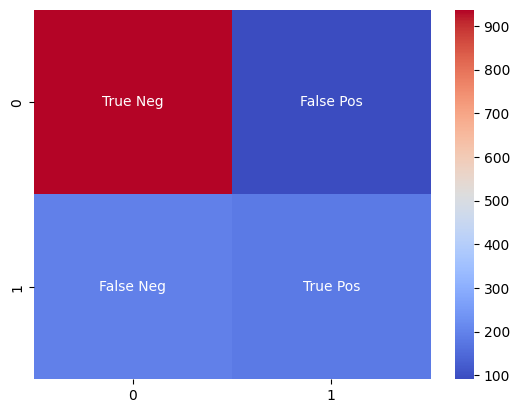

In [26]:
cf_matrix =metrics.confusion_matrix(y_test, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
print(cf_matrix)

In [27]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1028
           1       0.67      0.48      0.56       379

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.78      0.80      0.78      1407



In [28]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [29]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [30]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [31]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [32]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [33]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [34]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9437819420783645
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       501
           1       0.94      0.96      0.95       673

    accuracy                           0.94      1174
   macro avg       0.94      0.94      0.94      1174
weighted avg       0.94      0.94      0.94      1174



[[460  41]
 [ 25 648]]


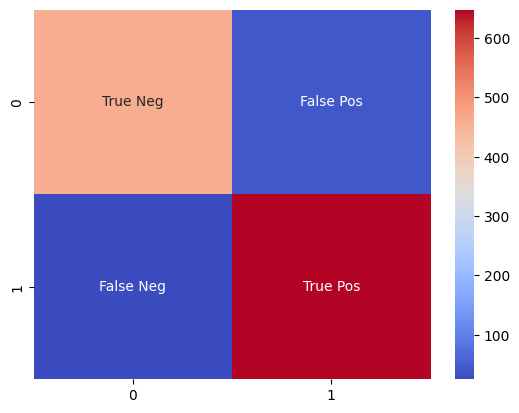

In [35]:
cf_matrix =metrics.confusion_matrix(yr_test1, yr_predict1)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
print(cf_matrix)

In [36]:
print(metrics.f1_score(yr_test1,yr_predict1,labels = [0,1]))
print(metrics.recall_score(yr_test1,yr_predict1,labels = [0,1]))
print(metrics.precision_score(yr_test1,yr_predict1,labels = [0,1]))
print(metrics.accuracy_score(yr_test1,yr_predict1))

0.9515418502202643
0.962852897473997
0.9404934687953556
0.9437819420783645


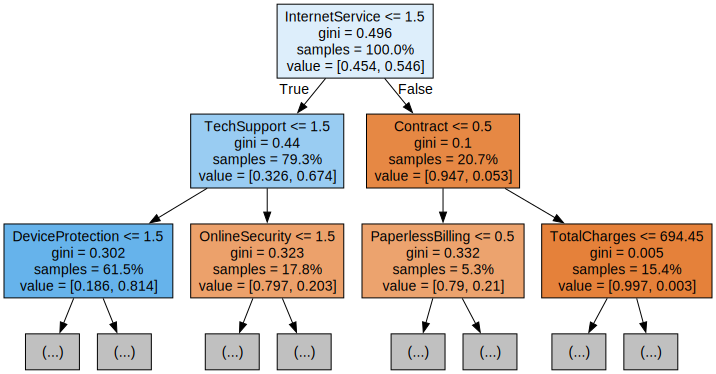

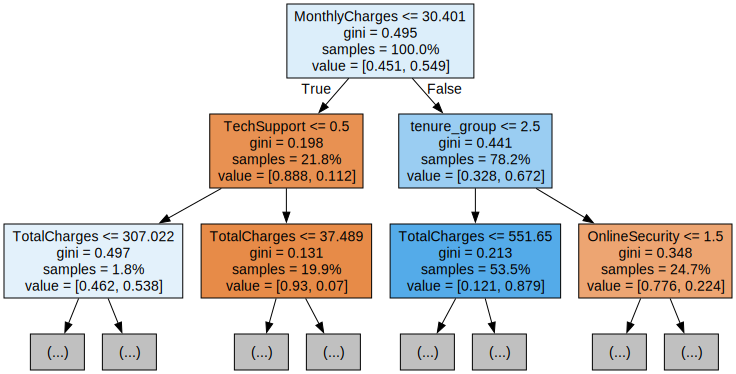

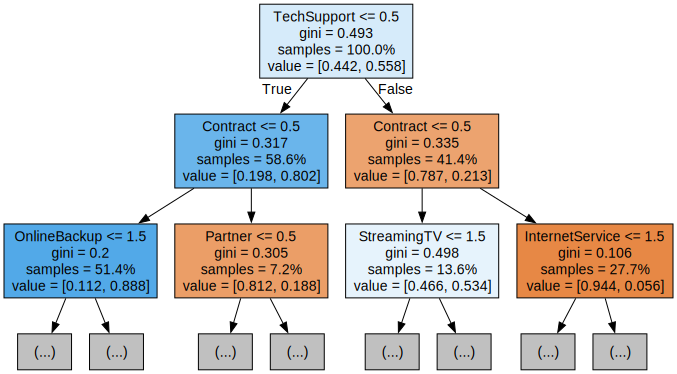

In [37]:
import graphviz
from sklearn.tree import export_graphviz

for i in range(3):
    tree = model_rf_smote.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=xr_train1.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=True, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

###### With RF Classifier, also we are able to get quite good results

#### Performing PCA

In [38]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [39]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [40]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [41]:
yr_predict_pca = model.predict(xr_test_pca)

In [42]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [43]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7095400340715503
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       501
           1       0.72      0.81      0.76       673

    accuracy                           0.71      1174
   macro avg       0.71      0.69      0.70      1174
weighted avg       0.71      0.71      0.71      1174



##### With PCA, we couldn't see any better results :)

#### Pickling the model

In [44]:
import pickle
import joblib

In [45]:
filename = 'model.pkl'

In [46]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [47]:
load_model = pickle.load(open(filename, 'rb'))

In [48]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [49]:
model_score_r1